# Mt Wilson Sunspot database 1917-1985

From the readme: 

> Sunspot umbral position and area information were digitized from the Mount Wilson daily white-light solar images some years ago (Howard, Gilman, and Gilman, 1984). These photographic images exist in a series that extends from 1917 through the present time. The digitized data extend from 1917 through 1985. Details about the observations, the measurement procedure, and the analysis techniques used earlier may be obtained from the earlier reference (Howard, Gilman, and Gilman, 1984).

These data were first published in [Howard, Gilman, and Gilman, 1984](http://adsabs.harvard.edu/abs/1984ApJ...283..373H). The data are accessible online [here](http://www.ngdc.noaa.gov/stp/solar/sunspotregionsdata.html).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

#paths = glob('/Users/bmmorris/data/Mt_Wilson_Tilt/*/sspot??.dat')
paths = glob('/local/tmp/Mt_Wilson_Tilt/*/sspot??.dat')

from astropy.time import Time
import astropy.units as u
import string
from astropy.table import Table

In [2]:
def split_interval(string, n, cast_to_type=float):
    return [cast_to_type(string[i:i+n]) for i in range(0, len(string), n)]

all_years_array = []

header = ("jd n_spots_leading n_spots_following n_spots_day_1 n_spots_day_2 "
          "rotation_rate latitude_drift area_weighted_latitude_day_1 area_weighted_longitude_day_1 "
          "area_weighted_longitude_day_2 area_day_1 area_day_2 tilt_day_1 delta_polarity_separation "
          "area_weighted_longitude_day_1_leading area_weighted_longitude_day_1_following "
          "area_weighted_latitude_day_1_leading area_weighted_latitude_day_1_following "
          "area_leading area_following area_weighted_longitude_day_2_leading " 
          "area_weighted_longitude_day_2_following delta_tilt").split()

header = ("jd n_spots_leading n_spots_following n_spots_day_1 n_spots_day_2 "
          "rotation_rate latitude_drift latitude_day_1 latitude_day_2 longitude_day_1 "
          "longitude_day_2 area_day_1 area_day_2 group_latitude_day_1 group_longitude_day_1 "
          "group_area_day_1 group_area_day_2 polarity_day_1 polarity_change tilt_day_1 tilt_day_2 "
          "group_rotation_rate group_latitude_drift").split()

for path in paths:
    f = open(path).read().splitlines()

    n_rows = len(f) // 3
    n_columns = 23#18
    yearly_array = np.zeros((n_rows, n_columns))

    for i in range(n_rows):
        # First five ints specify time, afterwards specify sunspot data
        int_list = split_interval(f[0+i*3][:18], 2, int)
        month, day, year_minus_1900, hour, minute = int_list[:5]
        year = year_minus_1900 + 1900
        jd = Time("{year:d}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}"
                  .format(**locals())).jd
        row = [jd] + int_list[5:] + split_interval(f[1+i*3], 7) + split_interval(f[2+i*3][1:], 7)
        yearly_array[i, :] = row

    all_years_array.append(yearly_array)

table = Table(np.vstack(all_years_array), names=header)

In [3]:
table

jd,n_spots_leading,n_spots_following,n_spots_day_1,n_spots_day_2,rotation_rate,latitude_drift,latitude_day_1,latitude_day_2,longitude_day_1,longitude_day_2,area_day_1,area_day_2,group_latitude_day_1,group_longitude_day_1,group_area_day_1,group_area_day_2,polarity_day_1,polarity_change,tilt_day_1,tilt_day_2,group_rotation_rate,group_latitude_drift
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2435473.76042,2.0,2.0,4.0,7.0,12.138,0.66,-20.848,-21.515,-20.81,-9.536,0.673,1.197,-20.883,-21.027,9.632,5.72,2.217,-0.773,-11.832,42.861,12.809,0.62
2435473.76042,2.0,2.0,4.0,7.0,12.277,0.604,-20.905,-21.515,-20.951,-9.536,8.599,1.197,-20.883,-21.027,9.632,5.72,2.217,-0.773,-11.832,42.861,12.809,0.62
2435473.76042,6.0,6.0,12.0,3.0,14.749,0.283,26.82,27.105,18.48,32.393,7.247,3.183,26.342,16.924,39.899,4.611,4.233,-2.677,33.501,65.282,16.504,0.33
2435473.76042,6.0,6.0,12.0,3.0,14.856,0.025,25.661,25.686,19.1,33.121,5.209,1.378,26.342,16.924,39.899,4.611,4.233,-2.677,33.501,65.282,16.504,0.33
2435473.76042,6.0,6.0,12.0,3.0,14.462,0.218,25.466,25.686,19.499,33.121,4.205,1.378,26.342,16.924,39.899,4.611,4.233,-2.677,33.501,65.282,16.504,0.33
2435473.76042,6.0,6.0,12.0,3.0,14.041,0.266,25.417,25.686,19.924,33.121,0.05,1.378,26.342,16.924,39.899,4.611,4.233,-2.677,33.501,65.282,16.504,0.33
2435474.75,3.0,4.0,7.0,5.0,13.592,0.048,-21.515,-21.563,-9.536,3.103,1.197,3.624,-21.512,-9.074,5.72,13.079,1.444,-0.056,42.861,56.895,13.555,-0.73
2435474.75,3.0,4.0,7.0,5.0,13.625,0.052,-21.247,-21.299,-9.803,2.869,0.214,1.508,-21.512,-9.074,5.72,13.079,1.444,-0.056,42.861,56.895,13.555,-0.73
2435474.75,3.0,4.0,7.0,5.0,13.35,-0.18,-20.795,-20.614,-8.7,3.696,0.75,2.933,-21.512,-9.074,5.72,13.079,1.444,-0.056,42.861,56.895,13.555,-0.73


6
[(3, 4), (5, 6), (9, 10)]
21
0
0
0
0
0
[(0, 1), (22, 23), (23, 24)]
[(0, 28), (29, 30)]
[(23, 28), (24, 28)]
[(26, 27)]
[(20, 26), (21, 26)]
[(18, 25), (24, 25)]
25
[(1, 2), (8, 9), (10, 11), (11, 12)]
[(19, 20)]
20
[(8, 9), (11, 12)]
12
2
0
0
[(0, 1)]
7
[(5, 6), (6, 7)]
[(6, 7)]
7
6
[(6, 7), (10, 12)]
[(8, 14)]
14
15
[(0, 1), (4, 5), (9, 10), (13, 14)]
12
[(2, 3), (16, 17), (19, 20), (20, 21)]
[(17, 18)]
18
[(2, 3), (5, 6)]
[(3, 13)]
13
[(4, 6), (5, 6)]
[(3, 14), (3, 15), (14, 15)]
16
[(2, 3), (4, 5), (14, 15)]
17
0
[(2, 3), (21, 22)]
[(1, 19)]
20
0
10
[(6, 7)]
11
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (5, 6), (11, 12), (14, 15)]
[(8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)]
[(4, 31), (9, 26), (10, 31), (11, 12), (13, 14), (13, 15), (13, 16), (14, 16), (15, 16), (18, 19), (18, 22), (18, 23), (19, 22), (19, 23), (20

IndexError: list index out of range

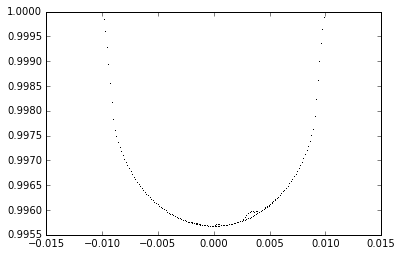

In [4]:
import sys
sys.path.insert(0, '/astro/users/bmmorris/git/friedrich/')
from friedrich.stsp import STSP
from friedrich.lightcurve import LightCurve, hat11_params_morris_experiment, hat11_params_morris

class Spot(object):
    def __init__(self, r, theta, phi):
        self.r = r
        self.theta = theta
        self.phi = phi
        
def spot_list_to_spot_params(spot_list):
    spot_params = []
    for spot in spot_list:
        spot_params.extend([spot.r, spot.theta, spot.phi])
    return spot_params

def find_overlapping_spots(spot_list):
    # starting from MCMCResults.find_overlapping_spots
    overlapping_pairs = []
    spots_with_overlap = []
    for i in range(len(spot_list)):
        for j in range(len(spot_list)):
            if i < j:
                sep = np.arccos(np.cos(spot_list[i].theta) * np.cos(spot_list[j].theta) + 
                                np.sin(spot_list[i].theta) * np.sin(spot_list[j].theta) * 
                                np.cos(spot_list[i].phi - spot_list[j].phi))
                if sep < 1.01 * (spot_list[i].r + spot_list[j].r):
                    overlapping_pairs.append((i, j))

                    if i not in spots_with_overlap:
                        spots_with_overlap.append(i)
                    if j not in spots_with_overlap:
                        spots_with_overlap.append(j)

    spots_without_overlap = [spot for i, spot in enumerate(spot_list)
                             if i not in spots_with_overlap]
    return overlapping_pairs, spots_with_overlap, spots_without_overlap

transit_params = hat11_params_morris() #hat11_params_morris_experiment()
# transit_params.inc_stellar = 120

times = Time(np.arange(transit_params.t0 - 0.06, 
                       transit_params.t0 + 0.06, 1./60/24), format='jd')
lc = LightCurve(times=times, fluxes=np.ones(len(times)), errors=np.ones(len(times)))

n_days = int(10 * 365/5)
#n_days = 10

bigfig, bigax = plt.subplots()

for n in range(n_days):
    start_time = Time('1960-01-01') + n*5*u.day
    end_time = start_time + 1*u.day# Time('1947-04-09')

    time_range = (table['jd'] < end_time.jd) & (table['jd'] > start_time.jd)
    spots_within_range = table[time_range]

    penumbra_to_umbra_area_ratio = 4.0
    
    area = penumbra_to_umbra_area_ratio * 1e-6 * spots_within_range['area_day_1'].data
    #r = np.arctan(np.sqrt(2 * area))
    radii = np.sqrt(2 * area)

    phis = np.radians(spots_within_range['longitude_day_1'].data)
    phis[phis < 0] += 2*np.pi
    
    thetas = np.radians(90 - spots_within_range['latitude_day_1'].data)

    spots = [Spot(r, theta, phi) for r, theta, phi in zip(radii, thetas, phis)]
    #print(spots_within_range)
    overlapping_pairs, spots_with_overlap, spots_without_overlap = find_overlapping_spots(spots)
    while len(overlapping_pairs) > 0:
        print(overlapping_pairs)
        
        for spot_pair in overlapping_pairs:
            spot_a = spots[spot_pair[0]]
            spot_b = spots[spot_pair[1]]
            mean_theta = 0.5 * (spot_a.theta + spot_b.theta)
            mean_phi = 0.5 * (spot_a.phi + spot_b.phi)
            total_area = np.pi * (spot_a.r**2 + spot_b.r**2)
            total_r = np.sqrt(total_area/np.pi)
        
            new_spot = Spot(total_r, mean_theta, mean_phi)
            spots_without_overlap.append(new_spot)
            
        overlapping_pairs, spots_with_overlap, spots_without_overlap = find_overlapping_spots(spots_without_overlap)

    spot_params = spot_list_to_spot_params(spots_without_overlap)
    print(len(spots_without_overlap))

    if len(spot_params) > 0:
        spot_params = np.array(spot_params)                
    else:
        spot_params = np.array([0.00001, 3*np.pi/2, np.pi/2])

    # fig, ax = plt.subplots()
    # ax.plot(np.degrees(phi) - 180, np.degrees(theta) - 90,'o')
    # plt.show()
    if len(spot_params) / 3 < 40:
        s = STSP(lc, transit_params, spot_params)
        t, f = s.stsp_lc()

        typical_hat11_err = 0#4.63754918255e-05
        f += typical_hat11_err * np.random.randn(len(f))

        phase = ((t - transit_params.t0) % transit_params.per) / transit_params.per
        phase[phase > 0.5] -= 1
        # print(start_time.datetime.date())


        if len(spot_params)/3 > 1:

            fig, ax = plt.subplots() # plt.figure()
            ax.set_title('{0}, N={1}'.format(start_time.datetime.date(), len(spot_params)/3))
            ax.plot(phase, f, 'k.')
            # plt.plot(phase, f, 'r')
            ax.set_xlabel('Phase')
            ax.set_ylabel('Flux')
            ax.set_ylim([0.9953, 1.0005])
            fig.savefig('/astro/users/bmmorris/git/starspots/sun/tmp/{0}.png'.format(start_time.datetime.date()), 
                        bbox_inches='tight', dpi=100)
            plt.close()

            bigax.plot(phase, f, 'k,')#, alpha=0.4)


#         plt.show()

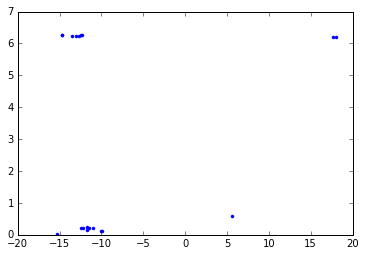

In [6]:
plt.plot(np.degrees(np.pi/2 - thetas), phis, '.')

In [7]:
spots_within_range

jd,n_spots_leading,n_spots_following,n_spots_day_1,n_spots_day_2,rotation_rate,latitude_drift,latitude_day_1,latitude_day_2,longitude_day_1,longitude_day_2,area_day_1,area_day_2,group_latitude_day_1,group_longitude_day_1,group_area_day_1,group_area_day_2,polarity_day_1,polarity_change,tilt_day_1,tilt_day_2,group_rotation_rate,group_latitude_drift
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2437074.91944,9.0,24.0,33.0,21.0,14.249,-0.32,-12.445,-12.126,12.649,25.867,27.547,9.084,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.009,-0.256,-11.697,-11.442,13.444,26.423,20.105,26.31,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.886,-0.1,-11.542,-11.442,12.57,26.423,3.231,26.31,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.389,-0.359,-11.042,-10.685,12.31,25.668,16.535,23.07,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.158,-0.289,-12.262,-11.974,11.995,25.123,4.31,8.974,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.597,-0.244,-9.976,-9.732,6.816,20.381,3.38,2.945,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.768,-0.347,-10.078,-9.732,6.646,20.381,2.812,2.945,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.571,-0.331,-11.771,-11.441,7.812,21.351,1.425,0.975,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05
2437074.91944,9.0,24.0,33.0,21.0,14.977,-0.259,-15.299,-15.041,0.609,14.552,6.796,7.508,-11.959,9.531,106.866,94.688,9.849,0.308,2.616,11.12,14.496,-0.05


In [ ]:
len(spot_params)/3

In [ ]:
spots_within_range

In [ ]:
for attr in dir(transit_params):
    if not attr.startswith('__'):
        print(attr, getattr(transit_params, attr))

In [ ]:
plt.plot(np.degrees(spot_params[1::3]), np.degrees(spot_params[2::3]), '.')

In [ ]:
spots_within_range['latitude_day_1']

In [ ]:
n_days = 100
for n in range(n_days):
    start_time = Time('1960-01-01') + n*5*u.day
    end_time = start_time + 1*u.day # Time('1947-04-09')

    time_range = (table['jd'] < end_time.jd) & (table['jd'] > start_time.jd)
    spots_within_range = table[time_range]
    
    plt.plot(spots_within_range['longitude_day_1'], 
             90 - spots_within_range['latitude_day_1'], '.')
plt.xlabel('theta = longitude')
plt.ylabel('phi = 90 - latitude')